In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

In [3]:
# Loading the Titanic dataset
titanic = sns.load_dataset('titanic')

In [4]:
# Drop rows with missing values
titanic = titanic.dropna(subset=['age', 'sex', 'fare', 'class', 'embarked'])

# Convert categorical features to numerical
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['class'] = titanic['class'].map({'First': 1, 'Second': 2, 'Third': 3})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

<ipython-input-4-d1e2c29192b4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
<ipython-input-4-d1e2c29192b4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['class'] = titanic['class'].map({'First': 1, 'Second': 2, 'Third': 3})
<ipython-input-4-d1e2c29192b4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [10]:
# Define features and target variable
X = titanic[['age', 'sex', 'fare', 'class', 'embarked']]
y = titanic['survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Confusion Matrix

Confusion Matrix:
 [[107  15]
 [ 31  61]]


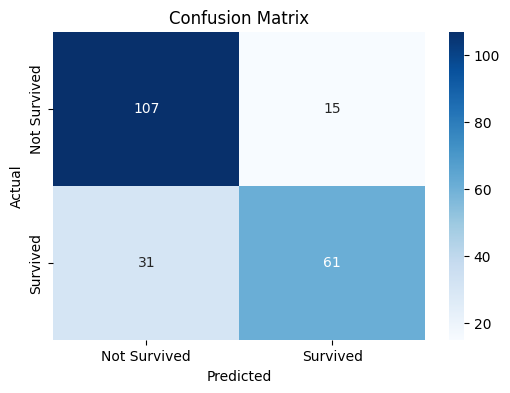

In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#  Accuracy

In [14]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7850467289719626


# Precision

In [15]:
# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)


Precision: 0.8026315789473685


# Recall

In [16]:
# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Recall: 0.6630434782608695


# F1 Score

In [17]:
# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.7261904761904762


# ROC Curve

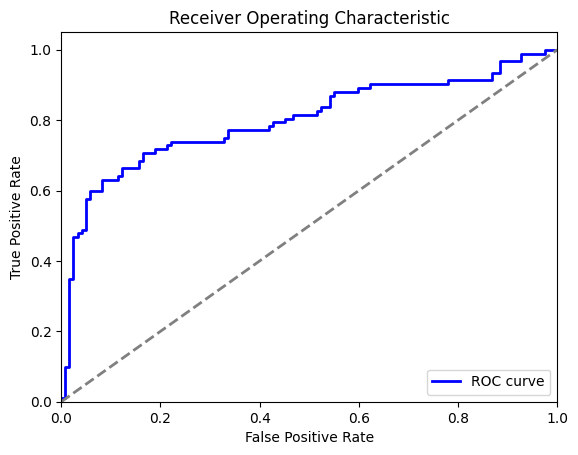

In [18]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# AUC (Area under the curve)

In [19]:
# AUC
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

AUC: 0.8004276550249466


# Cross Validation

In [20]:
from sklearn.model_selection import cross_val_score

# Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.74825175 0.83216783 0.78873239 0.76056338 0.80985915]
Mean Cross-Validation Score: 0.787914901999409


# Report

In [21]:
# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82       122
           1       0.80      0.66      0.73        92

    accuracy                           0.79       214
   macro avg       0.79      0.77      0.77       214
weighted avg       0.79      0.79      0.78       214

